In [3]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [10]:
train = pd.read_csv('C:/Users/admin/Documents/Bangkit/bangkit-assignment5/test.csv')
test = pd.read_csv('C:/Users/admin/Documents/Bangkit/bangkit-assignment5/train.csv')

In [11]:
train.shape

(1459, 80)

In [12]:
notnullcount = train.count()
# List the columns with more than 30 % missing values
nullmorethan30 = [n for n in notnullcount if n < 0.3 * train.shape[0]]
removablecolumns =[]
for v in nullmorethan30:
    colr = notnullcount[notnullcount == v].index[0]
    removablecolumns.append(colr)

In [13]:
train = train.drop(removablecolumns,1)

In [14]:
trainnew = train
for col in trainnew.columns:
    if(trainnew[col].dtype == np.dtype('O')):
        trainnew[col] = trainnew[col].fillna(trainnew[col].value_counts().index[0])
    else:
        trainnew[col] = trainnew[col].fillna(trainnew[col].mean())

In [15]:
print(trainnew.isnull().any().value_counts())

False    76
dtype: int64


In [16]:
dataset = trainnew.drop(['Id'], axis = 1)

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

dataset_numeric = dataset.select_dtypes(include=numerics)
dataset_numeric.shape

(1459, 36)

In [18]:
nonnumeric = ['object']
dataset_nonnumeric = trainnew.select_dtypes(include=nonnumeric)
dataset_nonnumeric.shape

(1459, 39)

In [19]:
del dataset_numeric['YrSold']
del dataset_numeric['MoSold']
del dataset_numeric['MiscVal']
del dataset_numeric['PoolArea']
del dataset_numeric['ScreenPorch']
del dataset_numeric['3SsnPorch']
del dataset_numeric['LowQualFinSF']
del dataset_numeric['BsmtFinSF2']
dataset_numeric.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,554.294925,...,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317
std,42.746880,20.561228,4955.517327,1.436812,1.113740,30.390071,21.130467,176.709824,455.111888,437.110508,...,0.829788,0.208472,1.508895,0.64742,25.714451,0.775679,216.974165,127.744882,68.883364,67.227765
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,219.500000,...,2.000000,1.000000,5.000000,0.00000,1960.500000,1.000000,318.000000,0.000000,0.000000,0.000000
50%,50.000000,68.580357,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,351.000000,460.000000,...,3.000000,1.000000,6.000000,0.00000,1977.721217,2.000000,480.000000,0.000000,28.000000,0.000000
75%,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,797.500000,...,3.000000,1.000000,7.000000,1.00000,2001.000000,2.000000,576.000000,168.000000,72.000000,0.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,2140.000000,...,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000


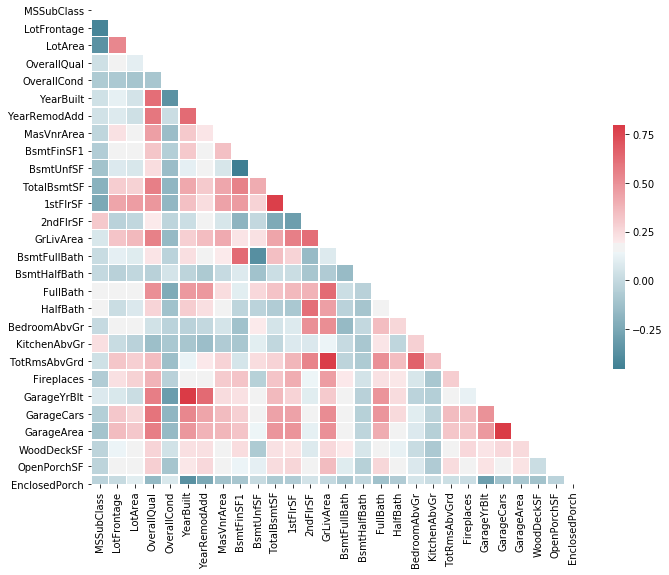

In [20]:
numeric_data_corr = dataset_numeric.corr()
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.zeros_like(numeric_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#
# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numeric_data_corr, mask=mask, cmap=cmap,vmax=.8,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [21]:
cols = dataset_nonnumeric.columns
split = 39
labels = []
for i in range(0,split):
    train = dataset_nonnumeric[cols[i]].unique()
    labels.append(list(set(train)))

In [36]:
#Import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_nonnumeric.iloc[:,i])
    feature = feature.reshape(dataset_nonnumeric.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False, n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning

In [40]:
rng = np.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data

#get the number of rows and columns
r, c = dataset_encoded.shape

y_train = dataset_encoded[:,c-1]
X_train = dataset_encoded[:,0:c-1]

train_X = np.asarray(dataset_numeric[:c-1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

NameError: name 'dataset_encoded' is not defined

Object `dataset_encoded` not found.
